# COGS 108 - Final Project 

# Overview

The research conducted focuses on the effect of time on the karma genreated for a given post on Reddit. We investigate the optimal time of day, and day of the week to post on 'r/funny' that would generate the greatest amount of upvotes, comments and views that readily predict a high karma count. The findings of this research question are useful beyond the trivial matter of boosting karma, they are valuable for businesses that use Reddit for marketing, for election posts that desire the greatest audience, for the greatest exposure to breaking news and controversial matters, etc. The implications of the research question at hand are great and can be further applied when additional subreddits are integrated. 

Our findings suggest that the optimal time to post for a high karma count are:..

# Names

- Cyrus Shen
- Randy Vo
- Kimberly Chuong
- Josue Ayala
- Conner Henderson
- Mykel Rodriguez

# Group Members IDs

- A########
- A12759508
- A15022184
- A########
- A########
- A########

# Research Question

What day of the week and time of day is optimal for maximizing the amount of karma for a given post on the r/funny subreddit of Reddit?

## Background and Prior Work

To run analysis on reddit data, we first had to gain permission to use Reddit's API. The API is readily accessibe after registering for use, and is easily manipulated using the Reddit API wrapper, Python praw. 
References (include links):
- 1)
- 2)

# Hypothesis


We predict that the weekends will be more effective for karma than weekdays and that evenings will be more effective than mornings and afternoons. Specifically, we predict that Saturday at 9pm will have the most posts overall with the highest upvotes and comments. 

# Dataset(s)

## Reddit API

The Reddit API is a service offered by the official Reddit website that allows access to extracting a multitude of its available information. For this project, we scraped data for the the first 100 posts from the 'New' section of the 'r/funny' subreddit and followed those posts for 24 hours (data broken down into 30 minute intervals) across all 7 days of the week, while collecting information on the number of upvotes, number of comments, and number of users online at corresponding time periods into csv files.

- Dataset Name: Reddit API
- Link to the dataset: https://www.reddit.com/wiki/api, https://github.com/reddit-archive/reddit/wiki/API
- Number of observations: Reddit API gives access to all submissions on their website, so there is an unlimited number of data   points we could gather. The datasets for one particular day of the week consists of 4900 observations for both number of       upvotes and number of comments, and 49 observations for number of users online.

# Setup

In [1]:
# Import libraries for data wrangling, data cleaning, and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure the imported libraries

# Display plots directly on the notebook
%matplotlib inline

# Display all columns and rows in DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Control figure aesthetics for seaborn
sns.set()
sns.set_context('talk')

# Data Cleaning

Let's take a look at the csv file datasets we have collected. To start off, we check the upvotes, comments, and number of online users datasets for the day of Sunday. Datasets are the same layout across all days in their respective categories of upvotes, comments, and users online.

In [3]:
# Load Sunday_upvotes.csv file into a DataFrame
df_Sunday_upvotes = pd.read_csv('Sunday_upvotes.csv')

# Check the first few rows
df_Sunday_upvotes.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,dxjvx7,1,5,6,7,7,5,4,4,6,7,5,3,3,3,4,2,5,3,4,4,5,6,2,5,6,6,6,3,4,2,4,2,3,4,4,5,4,4,4,4,3,4,3,3,3,3,6,5,2
1,dxjvrw,2,18,26,27,26,33,36,36,37,36,37,34,35,38,35,37,34,34,35,39,39,34,37,35,34,39,35,33,38,37,37,38,33,38,39,38,35,35,36,33,36,37,37,33,38,36,37,34,36
2,dxjvlv,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,dxjvi3,4,27,34,55,66,69,77,85,92,102,111,124,125,128,132,126,129,128,133,138,135,140,139,144,144,144,142,146,146,148,146,149,147,147,149,153,151,147,146,152,148,149,149,145,149,148,152,149,149
4,dxjv8u,1,7,7,6,5,5,5,6,5,4,6,6,6,6,7,5,8,5,5,6,6,7,5,6,6,6,4,4,5,7,6,5,8,6,4,5,5,6,7,4,7,4,7,6,7,5,6,8,7


In [4]:
# Load Sunday_comments.csv file into a DataFrame
df_Sunday_comments = pd.read_csv('Sunday_comments.csv')
df_Sunday_comments.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,dxjvx7,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,dxjvrw,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,dxjvlv,0,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,dxjvi3,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,dxjv8u,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [5]:
# Load Sunday_online_users.csv file into a DataFrame
df_Sunday_online_users = pd.read_csv('Sunday_online_users.csv', index_col = 0)
df_Sunday_online_users.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
timestamp,1.573978e+09,1.573979e+09,1.573981e+09,1.573983e+09,1.573985e+09,1.573987e+09,1.573988e+09,1.573990e+09,1.573992e+09,1.573994e+09,1.573996e+09,1.573998e+09,1.573999e+09,1.574001e+09,1.574003e+09,1.574005e+09,1.574007e+09,1.574009e+09,1.574010e+09,1.574012e+09,1.574014e+09,1.574016e+09,1.574018e+09,1.574019e+09,1.574021e+09,1.574023e+09,1.574025e+09,1.574027e+09,1.574029e+09,1.574030e+09,1.574032e+09,1.574034e+09,1.574036e+09,1.574038e+09,1.574039e+09,1.574041e+09,1.574043e+09,1.574045e+09,1.574047e+09,1.574049e+09,1.574050e+09,1.574052e+09,1.574054e+09,1.574056e+09,1.574058e+09,1.574060e+09,1.574061e+09,1.574063e+09,1.574065e+09
users_online,2.012800e+04,2.198900e+04,2.210100e+04,2.531800e+04,2.667100e+04,1.683600e+04,1.760700e+04,1.843800e+04,1.992500e+04,2.666500e+04,2.677800e+04,3.675000e+04,4.600300e+04,7.104600e+04,5.769500e+04,6.357800e+04,2.788000e+04,3.209100e+04,6.131300e+04,5.629900e+04,5.533500e+04,5.356600e+04,6.809000e+04,5.293300e+04,4.641200e+04,4.414000e+04,4.266400e+04,4.330800e+04,4.390300e+04,4.387400e+04,4.877100e+04,4.997800e+04,4.763000e+04,4.541000e+04,5.162000e+04,5.217000e+04,4.810800e+04,4.170900e+04,3.703400e+04,3.584300e+04,3.317400e+04,3.570100e+04,4.902900e+04,5.825500e+04,5.205100e+04,4.384900e+04,3.820600e+04,3.752000e+04,3.499100e+04


Looking at the datasets above, we see that there are no column names indicated, making the datasets overall not human reader-friendly. Therefore, some data cleaning needs to be done to increase the readability of these datasets.

In [6]:
# Add/rename column names for Sunday upvotes
df_Sunday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Sunday_upvotes.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Sunday_upvotes.head()

,id,12:00 am,12:30 am,1:00 am,1:30 am,2:00 am,2:30 am,3:00 am,3:30 am,4:00 am,4:30 am,5:00 am,5:30 am,6:00 am,6:30 am,7:00 am,7:30 am,8:00 am,8:30 am,9:00 am,9:30 am,10:00 am,10:30 am,11:00 am,11:30 am,12:00 pm,12:30 pm,1:00 pm,1:30 pm,2:00 pm,2:30 pm,3:00 pm,3:30 pm,4:00 pm,4:30 pm,5:00 pm,5:30 pm,6:00 pm,6:30 pm,7:00 pm,7:30 pm,8:00 pm,8:30 pm,9:00 pm,9:30 pm,10:00 pm,10:30 pm,11:00 pm,11:30 pm,11:59 pm
0,dxjvx7,1,5,6,7,7,5,4,4,6,7,5,3,3,3,4,2,5,3,4,4,5,6,2,5,6,6,6,3,4,2,4,2,3,4,4,5,4,4,4,4,3,4,3,3,3,3,6,5,2
1,dxjvrw,2,18,26,27,26,33,36,36,37,36,37,34,35,38,35,37,34,34,35,39,39,34,37,35,34,39,35,33,38,37,37,38,33,38,39,38,35,35,36,33,36,37,37,33,38,36,37,34,36
2,dxjvlv,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,dxjvi3,4,27,34,55,66,69,77,85,92,102,111,124,125,128,132,126,129,128,133,138,135,140,139,144,144,144,142,146,146,148,146,149,147,147,149,153,151,147,146,152,148,149,149,145,149,148,152,149,149
4,dxjv8u,1,7,7,6,5,5,5,6,5,4,6,6,6,6,7,5,8,5,5,6,6,7,5,6,6,6,4,4,5,7,6,5,8,6,4,5,5,6,7,4,7,4,7,6,7,5,6,8,7


In [7]:
# Add/rename column names for Sunday comments
df_Sunday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Sunday_comments.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Sunday_comments.head()

,id,12:00 am,12:30 am,1:00 am,1:30 am,2:00 am,2:30 am,3:00 am,3:30 am,4:00 am,4:30 am,5:00 am,5:30 am,6:00 am,6:30 am,7:00 am,7:30 am,8:00 am,8:30 am,9:00 am,9:30 am,10:00 am,10:30 am,11:00 am,11:30 am,12:00 pm,12:30 pm,1:00 pm,1:30 pm,2:00 pm,2:30 pm,3:00 pm,3:30 pm,4:00 pm,4:30 pm,5:00 pm,5:30 pm,6:00 pm,6:30 pm,7:00 pm,7:30 pm,8:00 pm,8:30 pm,9:00 pm,9:30 pm,10:00 pm,10:30 pm,11:00 pm,11:30 pm,11:59 pm
0,dxjvx7,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,dxjvrw,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,dxjvlv,0,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,dxjvi3,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,dxjv8u,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [8]:
# Add/rename column names for Sunday online users
df_Sunday_online_users.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

# Switch rows and columns
df_Sunday_online_users = df_Sunday_online_users.transpose()

# Drop first column since we are only interested in plotting the number of online users
df_Sunday_online_users = df_Sunday_online_users.drop('timestamp', axis=1)

df_Sunday_online_users.head()

,users_online
12:00 am,20128.0
12:30 am,21989.0
1:00 am,22101.0
1:30 am,25318.0
2:00 am,26671.0


We now do the same data cleaning for the remaining days of the week (Monday through Saturday).

In [9]:
# Clean Monday files
df_Monday_upvotes = pd.read_csv('Monday_votes.csv')
df_Monday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Monday_upvotes.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Monday_comments = pd.read_csv('Monday_comments.csv')
df_Monday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Monday_comments.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Monday_online_users = pd.read_csv('Monday_online_users.csv', index_col = 0)
df_Monday_online_users.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)
df_Monday_online_users = df_Monday_online_users.transpose()
df_Monday_online_users = df_Monday_online_users.drop('timestamp', axis=1)

In [10]:
# Clean Tuesday files
df_Tuesday_upvotes = pd.read_csv('Tuesday_votes.csv')
df_Tuesday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Tuesday_upvotes.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Tuesday_comments = pd.read_csv('Tuesday_comments.csv')
df_Tuesday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Tuesday_comments.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Tuesday_online_users = pd.read_csv('Tuesday_online_users.csv', index_col = 0)
df_Tuesday_online_users.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)
df_Tuesday_online_users = df_Tuesday_online_users.transpose()
df_Tuesday_online_users = df_Tuesday_online_users.drop('timestamp', axis=1)

In [11]:
# Clean Wednesday files
df_Wednesday_upvotes = pd.read_csv('Wednesday_votes.csv')
df_Wednesday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Wednesday_upvotes.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Wednesday_comments = pd.read_csv('Wednesday_comments.csv')
df_Wednesday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Wednesday_comments.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Wednesday_online_users = pd.read_csv('Wednesday_online_users.csv', index_col = 0)
df_Wednesday_online_users.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)
df_Wednesday_online_users = df_Wednesday_online_users.transpose()
df_Wednesday_online_users = df_Wednesday_online_users.drop('timestamp', axis=1)

In [12]:
# Clean Thursday files
df_Thursday_upvotes = pd.read_csv('Thursday_votes.csv')
df_Thursday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Thursday_upvotes.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Thursday_comments = pd.read_csv('Thursday_comments.csv')
df_Thursday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Thursday_comments.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Thursday_online_users = pd.read_csv('Thursday_online_users.csv', index_col = 0)
df_Thursday_online_users.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)
df_Thursday_online_users = df_Thursday_online_users.transpose()
df_Thursday_online_users = df_Thursday_online_users.drop('timestamp', axis=1)

In [13]:
# Clean Friday files
df_Friday_upvotes = pd.read_csv('Friday_upvotes.csv')
df_Friday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Friday_upvotes.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Friday_comments = pd.read_csv('Friday_comments.csv')
df_Friday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Friday_comments.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Friday_online_users = pd.read_csv('Friday_online.csv', index_col = 0)
df_Friday_online_users.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)
df_Friday_online_users = df_Friday_online_users.transpose()
df_Friday_online_users = df_Friday_online_users.drop('timestamp', axis=1)

In [14]:
# Clean Saturday files
df_Saturday_upvotes = pd.read_csv('Saturday_votes.csv')
df_Saturday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Saturday_upvotes.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Saturday_comments = pd.read_csv('Saturday_comments.csv')
df_Saturday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Saturday_comments.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)

df_Saturday_online_users = pd.read_csv('Saturday_online_users.csv', index_col = 0)
df_Saturday_online_users.rename(columns = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}, inplace = True)
df_Saturday_online_users = df_Saturday_online_users.transpose()
df_Saturday_online_users = df_Saturday_online_users.drop('timestamp', axis=1)

## Find the Average Number of Upvotes

Before starting our analyses on the data, we need to find the average number of upvotes in all datasets corresponding to 30 minute intervals of the 24-hour period. We will use these averages as plot points for our line graphs for each day of the week.

In [15]:
# Find the mean for all 30 minute time intervals for every day of the week
df_Sunday_upvotes.loc['mean'] = df_Sunday_upvotes.mean()
df_Monday_upvotes.loc['mean'] = df_Monday_upvotes.mean()
df_Tuesday_upvotes.loc['mean'] = df_Tuesday_upvotes.mean()
df_Wednesday_upvotes.loc['mean'] = df_Wednesday_upvotes.mean()
df_Thursday_upvotes.loc['mean'] = df_Thursday_upvotes.mean()
df_Friday_upvotes.loc['mean'] = df_Friday_upvotes.mean()
df_Saturday_upvotes.loc['mean'] = df_Saturday_upvotes.mean()

# Check the last few rows for Sunday
df_Sunday_upvotes.tail()

,id,12:00 am,12:30 am,1:00 am,1:30 am,2:00 am,2:30 am,3:00 am,3:30 am,4:00 am,4:30 am,5:00 am,5:30 am,6:00 am,6:30 am,7:00 am,7:30 am,8:00 am,8:30 am,9:00 am,9:30 am,10:00 am,10:30 am,11:00 am,11:30 am,12:00 pm,12:30 pm,1:00 pm,1:30 pm,2:00 pm,2:30 pm,3:00 pm,3:30 pm,4:00 pm,4:30 pm,5:00 pm,5:30 pm,6:00 pm,6:30 pm,7:00 pm,7:30 pm,8:00 pm,8:30 pm,9:00 pm,9:30 pm,10:00 pm,10:30 pm,11:00 pm,11:30 pm,11:59 pm
96,dxi2zw,4.00,5.00,6.00,4.00,4.00,5.0,7.00,6.00,4.00,5.00,6.00,5.00,5.00,5.00,5.00,6.00,4.00,4.00,3.00,4.00,6.00,5.00,6.00,5.00,4.00,6.00,4.00,6.00,6.00,5.00,4.00,7.00,5.0,3.00,5.00,4.00,6.00,7.0,4.00,4.00,7.00,4.00,6.0,3.00,4.00,3.00,7.00,5.00,4.00
97,dxi1lg,253.00,304.00,353.00,411.00,462.00,489.0,515.00,557.00,576.00,578.00,580.00,579.00,579.00,583.00,581.00,579.00,579.00,580.00,575.00,584.00,576.00,584.00,578.00,587.00,586.00,586.00,582.00,586.00,580.00,582.00,585.00,586.00,585.0,586.00,580.00,585.00,583.00,584.0,582.00,587.00,587.00,591.00,589.0,581.00,584.00,581.00,585.00,584.00,586.00
98,dxi1k9,148.00,174.00,212.00,260.00,294.00,316.0,334.00,363.00,395.00,432.00,496.00,535.00,566.00,578.00,584.00,617.00,635.00,650.00,660.00,675.00,687.00,709.00,715.00,726.00,728.00,741.00,750.00,757.00,764.00,771.00,772.00,780.00,785.0,781.00,788.00,791.00,790.00,788.0,792.00,793.00,794.00,801.00,796.0,804.00,800.00,797.00,803.00,800.00,800.00
99,dxi1e9,30.00,31.00,31.00,30.00,33.00,31.0,35.00,38.00,34.00,38.00,40.00,40.00,38.00,39.00,45.00,43.00,42.00,37.00,42.00,43.00,45.00,40.00,44.00,45.00,41.00,44.00,39.00,44.00,41.00,41.00,42.00,40.00,39.0,41.00,43.00,39.00,43.00,37.0,39.00,41.00,39.00,45.00,39.0,42.00,42.00,41.00,41.00,41.00,45.00
mean,NaN,38.91,51.49,62.59,85.73,133.97,141.9,149.82,160.82,171.08,185.05,201.36,214.29,225.29,232.45,238.13,245.74,254.33,264.93,272.81,278.14,282.19,289.38,293.85,297.48,300.91,304.34,307.33,309.87,313.08,315.85,318.02,319.62,321.4,322.91,324.31,325.58,326.59,327.3,327.57,328.18,328.86,329.68,330.1,330.18,330.57,330.66,331.14,331.07,330.91


We are interested in plotting points for the average (mean) number of upvotes for each 30 minute interval, so we will be removing all rows and columns that are not relevant to plotting the average number of votes for the graphs. These extraneous data include the individual rows of upvotes for each 100 new posts from the r/funny subreddit. Since we will be plotting the averages, the NaN entry in the first column of the corresponding mean row will mess up the graphs during plotting. So, we will also do a removal of the id column.

In [16]:
# Drop all rows except mean
df_Sunday_mean_upvotes = df_Sunday_upvotes.drop(df_Sunday_upvotes.index[0:100])
df_Monday_mean_upvotes = df_Monday_upvotes.drop(df_Monday_upvotes.index[0:100])
df_Tuesday_mean_upvotes = df_Tuesday_upvotes.drop(df_Tuesday_upvotes.index[0:100])
df_Wednesday_mean_upvotes = df_Wednesday_upvotes.drop(df_Wednesday_upvotes.index[0:100])
df_Thursday_mean_upvotes = df_Thursday_upvotes.drop(df_Thursday_upvotes.index[0:100])
df_Friday_mean_upvotes = df_Friday_upvotes.drop(df_Friday_upvotes.index[0:100])
df_Saturday_mean_upvotes = df_Saturday_upvotes.drop(df_Saturday_upvotes.index[0:100])

In [17]:
# Drop the first column containing NaN value
df_Sunday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Monday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Tuesday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Wednesday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Thursday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Friday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Saturday_mean_upvotes.dropna(axis=1, how='any', inplace = True)

In [18]:
# Switch rows and columns
df_Sunday_mean_upvotes = df_Sunday_mean_upvotes.transpose()
df_Monday_mean_upvotes = df_Monday_mean_upvotes.transpose()
df_Tuesday_mean_upvotes = df_Tuesday_mean_upvotes.transpose()
df_Wednesday_mean_upvotes = df_Wednesday_mean_upvotes.transpose()
df_Thursday_mean_upvotes = df_Thursday_mean_upvotes.transpose()
df_Friday_mean_upvotes = df_Friday_mean_upvotes.transpose()
df_Saturday_mean_upvotes = df_Saturday_mean_upvotes.transpose()

# Check the modified dataset for Sunday
df_Sunday_mean_upvotes.head()

,mean
12:00 am,38.91
12:30 am,51.49
1:00 am,62.59
1:30 am,85.73
2:00 am,133.97


## Find the Average Number of Comments

Similarly to finding the average number of upvotes outlined above, we will also find the averages for the number of comments for each 30 minute interval over 24 hours.

In [19]:
# Find the mean for all 30 minute time intervals for every day of the week
df_Sunday_comments.loc['mean'] = df_Sunday_comments.mean()
df_Monday_comments.loc['mean'] = df_Monday_comments.mean()
df_Tuesday_comments.loc['mean'] = df_Tuesday_comments.mean()
df_Wednesday_comments.loc['mean'] = df_Wednesday_comments.mean()
df_Thursday_comments.loc['mean'] = df_Thursday_comments.mean()
df_Friday_comments.loc['mean'] = df_Friday_comments.mean()
df_Saturday_comments.loc['mean'] = df_Saturday_comments.mean()

In [20]:
# Drop all rows except mean
df_Sunday_mean_comments = df_Sunday_comments.drop(df_Sunday_comments.index[0:100])
df_Monday_mean_comments = df_Monday_comments.drop(df_Monday_comments.index[0:100])
df_Tuesday_mean_comments = df_Tuesday_comments.drop(df_Tuesday_comments.index[0:100])
df_Wednesday_mean_comments = df_Wednesday_comments.drop(df_Wednesday_comments.index[0:100])
df_Thursday_mean_comments = df_Thursday_comments.drop(df_Thursday_comments.index[0:100])
df_Friday_mean_comments = df_Friday_comments.drop(df_Friday_comments.index[0:100])
df_Saturday_mean_comments = df_Saturday_comments.drop(df_Saturday_comments.index[0:100])

In [21]:
# Drop the first column containing NaN value
df_Sunday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Monday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Tuesday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Wednesday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Thursday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Friday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Saturday_mean_comments.dropna(axis=1, how='any', inplace = True)

In [22]:
# Switch rows and columns
df_Sunday_mean_comments = df_Sunday_mean_comments.transpose()
df_Monday_mean_comments = df_Monday_mean_comments.transpose()
df_Tuesday_mean_comments = df_Tuesday_mean_comments.transpose()
df_Wednesday_mean_comments = df_Wednesday_mean_comments.transpose()
df_Thursday_mean_comments = df_Thursday_mean_comments.transpose()
df_Friday_mean_comments = df_Friday_mean_comments.transpose()
df_Saturday_mean_comments = df_Saturday_mean_comments.transpose()

# Check the modified dataset for Sunday
df_Sunday_mean_comments.head()

,mean
12:00 am,5.58
12:30 am,6.64
1:00 am,7.30
1:30 am,8.03
2:00 am,9.06


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Text(0, 0.5, 'Average Upvotes')

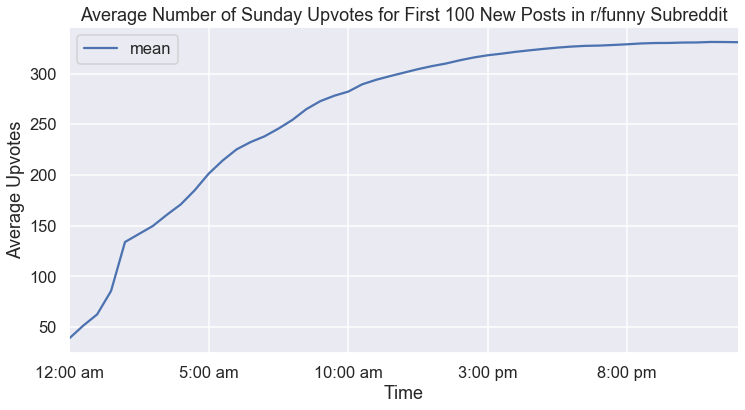

In [23]:
# Plot Sunday upvotes
df_Sunday_mean_upvotes.plot(figsize = (12, 6))
plt.title('Average Number of Sunday Upvotes for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Upvotes')

Text(0, 0.5, 'Average Comments')

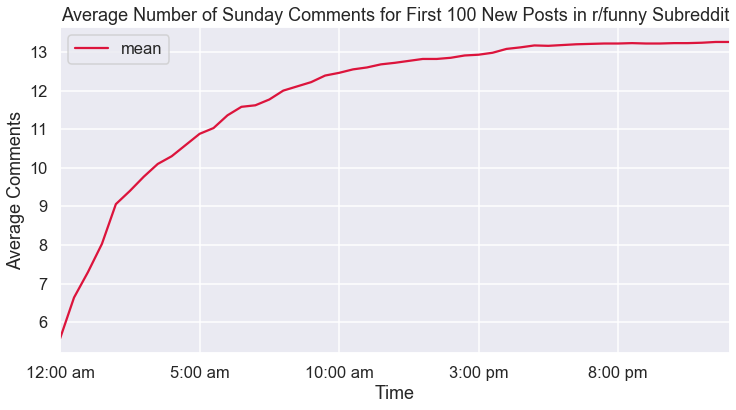

In [24]:
# Plot Sunday comments
df_Sunday_mean_comments.plot(figsize = (12, 6), color = 'crimson')
plt.title('Average Number of Sunday Comments for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Comments')

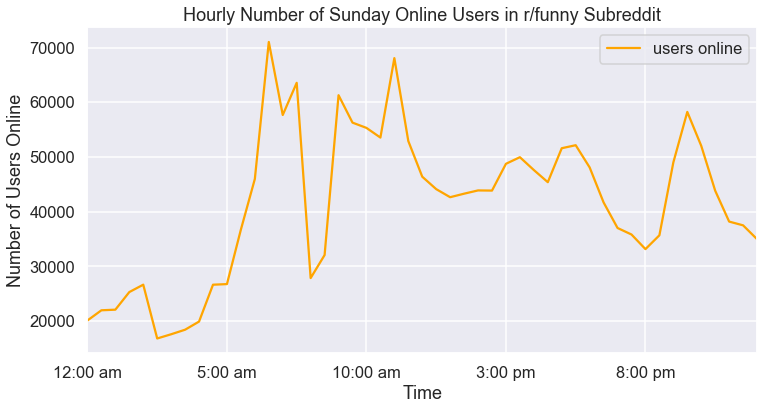

In [25]:
# Plot Sunday online users
df_Sunday_online_users.plot(figsize = (12, 6), color = 'orange')
plt.title('Hourly Number of Sunday Online Users in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Number of Users Online')
legend = plt.legend()
legend.get_texts()[0].set_text('users online')

Text(0, 0.5, 'Average Upvotes')

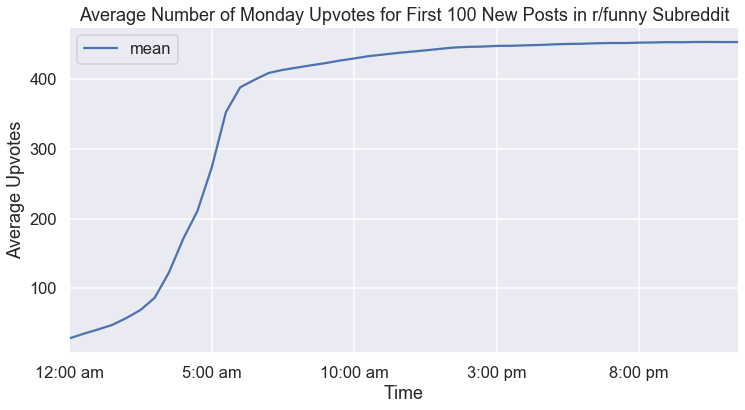

In [26]:
# Plot Monday upvotes
df_Monday_mean_upvotes.plot(figsize = (12, 6))
plt.title('Average Number of Monday Upvotes for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Upvotes')

Text(0, 0.5, 'Average Comments')

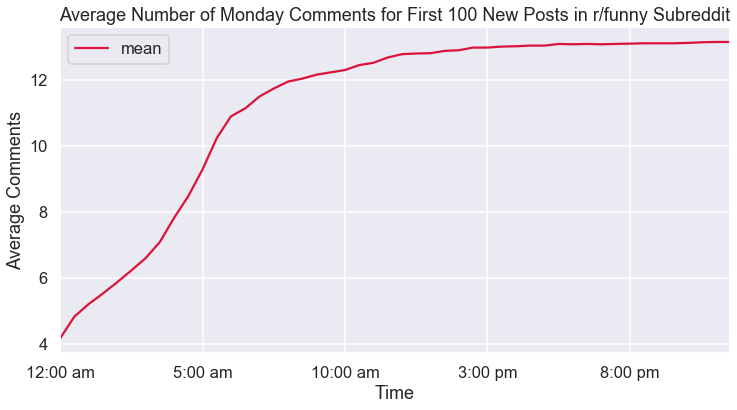

In [27]:
# Plot Monday comments
df_Monday_mean_comments.plot(figsize = (12, 6), color = 'crimson')
plt.title('Average Number of Monday Comments for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Comments')

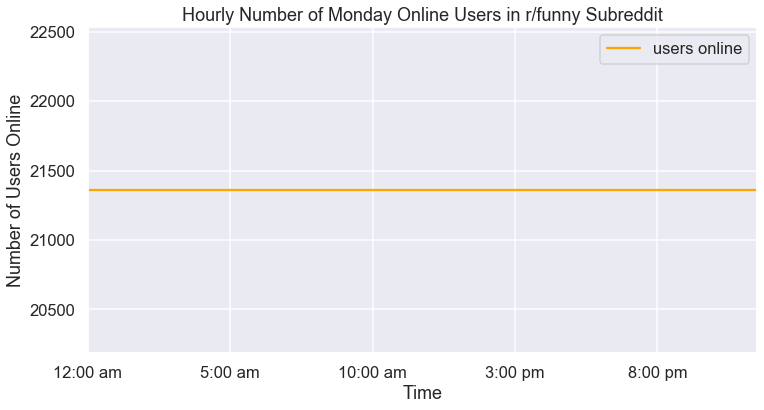

In [28]:
# Plot Monnday online users
df_Monday_online_users.plot(figsize = (12, 6), color = 'orange')
plt.title('Hourly Number of Monday Online Users in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Number of Users Online')
legend = plt.legend()
legend.get_texts()[0].set_text('users online')

Text(0, 0.5, 'Average Upvotes')

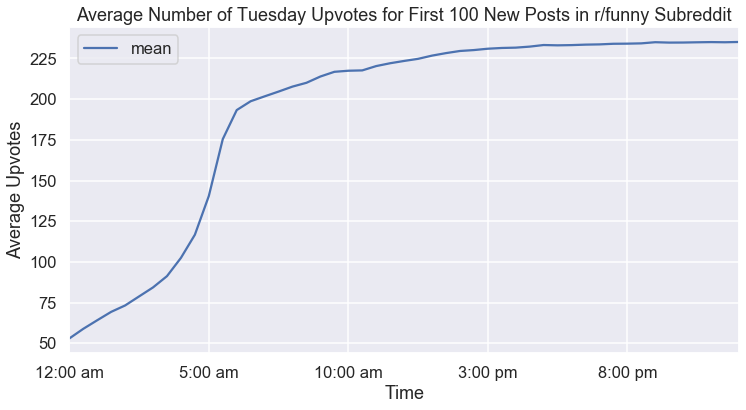

In [29]:
# Plot Tuesday upvotes
df_Tuesday_mean_upvotes.plot(figsize = (12, 6))
plt.title('Average Number of Tuesday Upvotes for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Upvotes')

Text(0, 0.5, 'Average Comments')

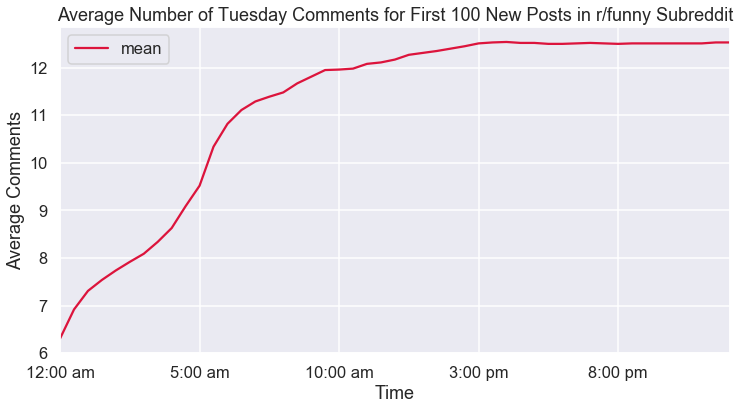

In [30]:
# Plot Tuesday comments
df_Tuesday_mean_comments.plot(figsize = (12, 6), color = 'crimson')
plt.title('Average Number of Tuesday Comments for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Comments')

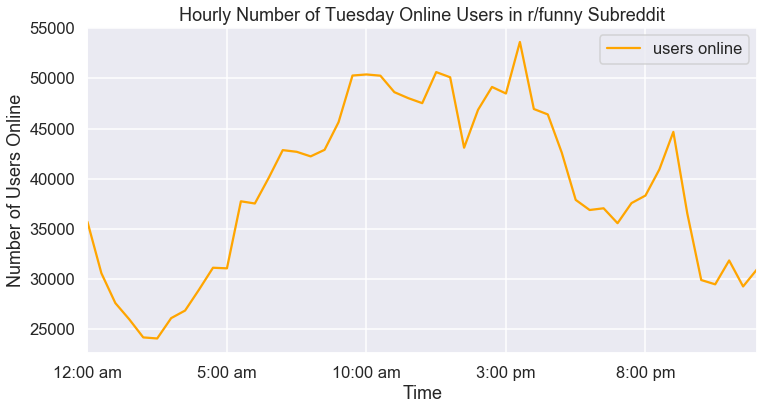

In [31]:
# Plot Tuesday online users
df_Tuesday_online_users.plot(figsize = (12, 6), color = 'orange')
plt.title('Hourly Number of Tuesday Online Users in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Number of Users Online')
legend = plt.legend()
legend.get_texts()[0].set_text('users online')

Text(0, 0.5, 'Average Upvotes')

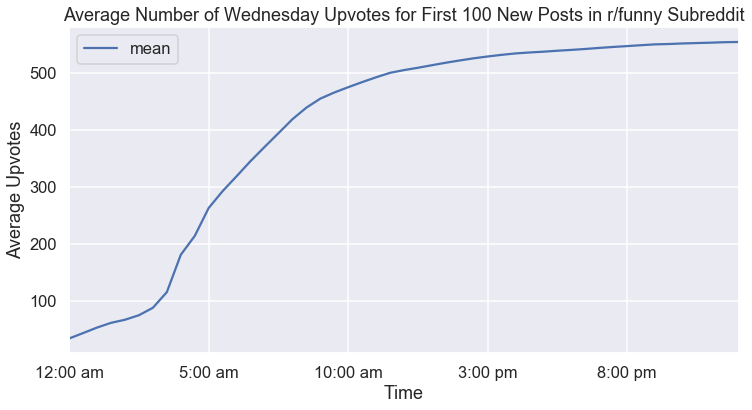

In [32]:
# Plot Wednesday upvotes
df_Wednesday_mean_upvotes.plot(figsize = (12, 6))
plt.title('Average Number of Wednesday Upvotes for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Upvotes')

Text(0, 0.5, 'Average Comments')

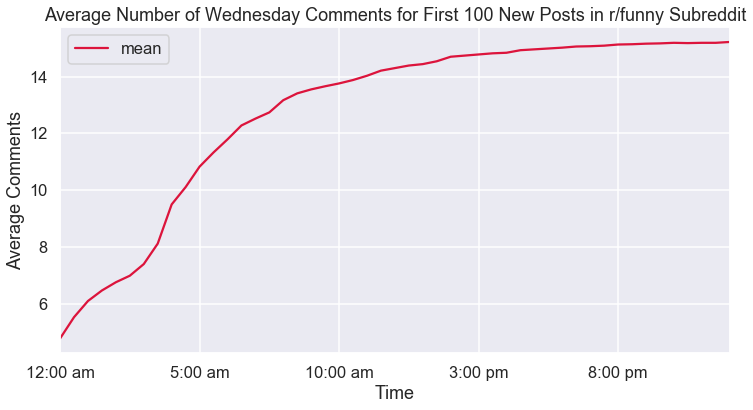

In [33]:
# Plot Wednesday comments
df_Wednesday_mean_comments.plot(figsize = (12, 6), color = 'crimson')
plt.title('Average Number of Wednesday Comments for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Comments')

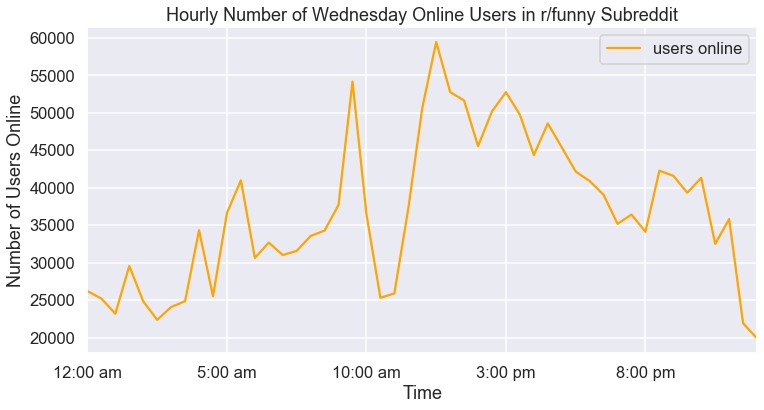

In [34]:
# Plot Wednesday online users
df_Wednesday_online_users.plot(figsize = (12, 6), color = 'orange')
plt.title('Hourly Number of Wednesday Online Users in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Number of Users Online')
legend = plt.legend()
legend.get_texts()[0].set_text('users online')

Text(0, 0.5, 'Average Upvotes')

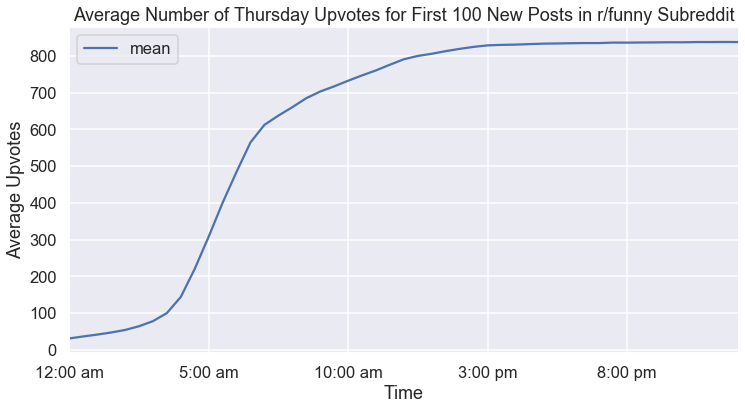

In [35]:
# Plot Thursday upvotes
df_Thursday_mean_upvotes.plot(figsize = (12, 6))
plt.title('Average Number of Thursday Upvotes for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Upvotes')

Text(0, 0.5, 'Average Comments')

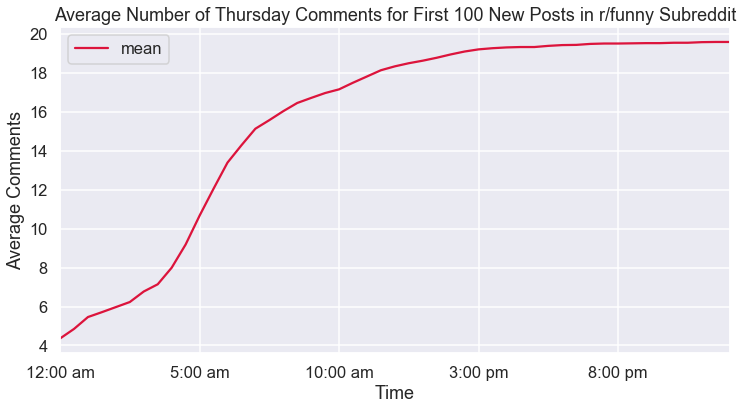

In [36]:
# Plot Thursday comments
df_Thursday_mean_comments.plot(figsize = (12, 6), color = 'crimson')
plt.title('Average Number of Thursday Comments for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Comments')

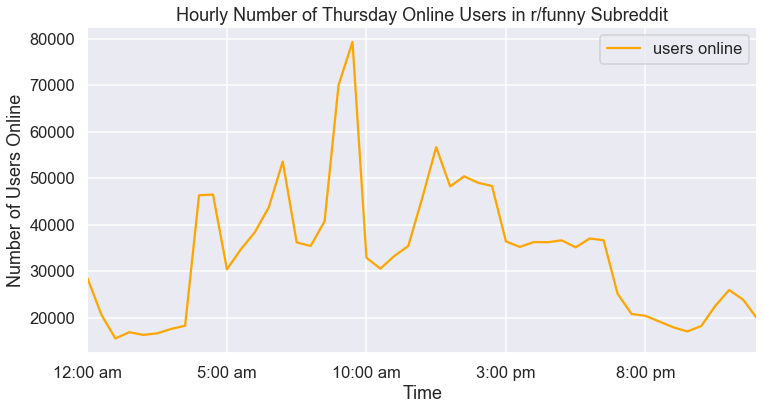

In [37]:
# Plot Thursday online users
df_Thursday_online_users.plot(figsize = (12, 6), color = 'orange')
plt.title('Hourly Number of Thursday Online Users in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Number of Users Online')
legend = plt.legend()
legend.get_texts()[0].set_text('users online')

Text(0, 0.5, 'Average Upvotes')

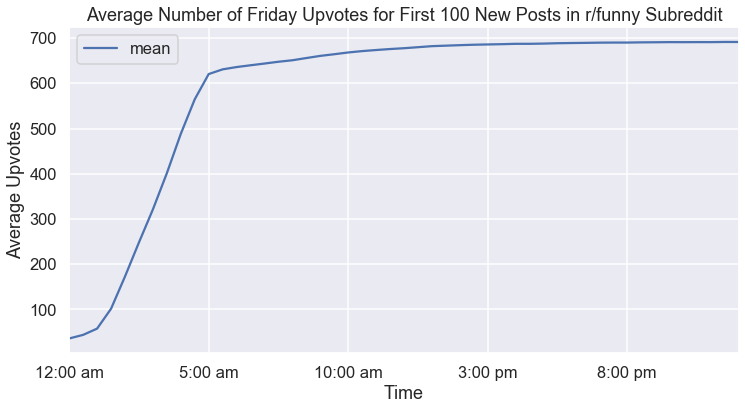

In [38]:
# Plot Friday upvotes
df_Friday_mean_upvotes.plot(figsize = (12, 6))
plt.title('Average Number of Friday Upvotes for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Upvotes')

Text(0, 0.5, 'Average Comments')

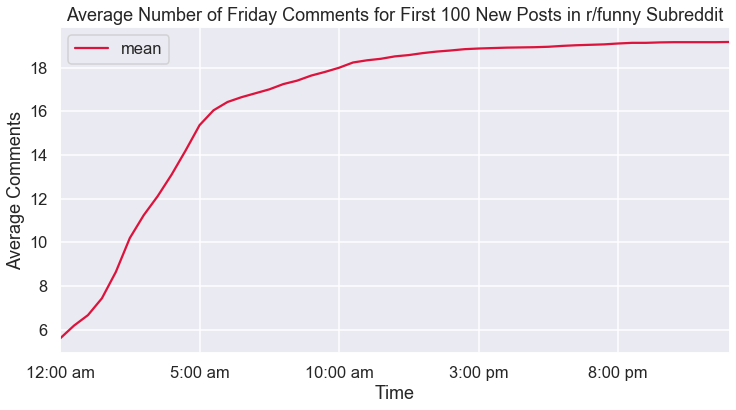

In [39]:
# Plot Friday comments
df_Friday_mean_comments.plot(figsize = (12, 6), color = 'crimson')
plt.title('Average Number of Friday Comments for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Comments')

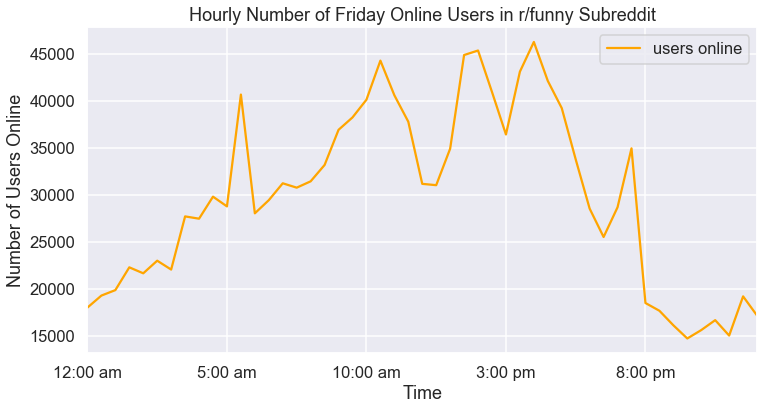

In [40]:
# Plot Friday online users
df_Friday_online_users.plot(figsize = (12, 6), color = 'orange')
plt.title('Hourly Number of Friday Online Users in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Number of Users Online')
legend = plt.legend()
legend.get_texts()[0].set_text('users online')

Text(0, 0.5, 'Average Upvotes')

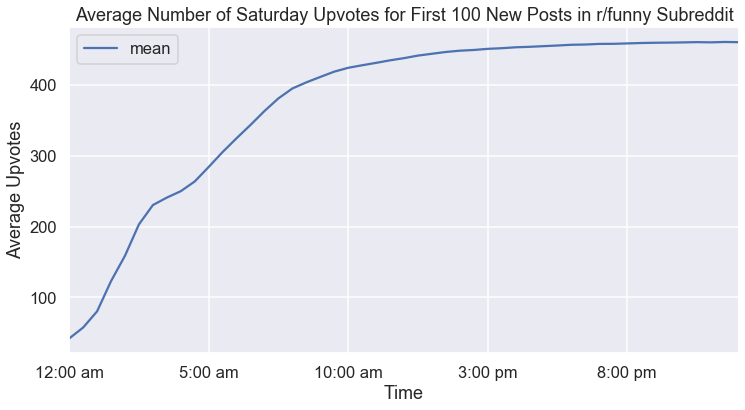

In [41]:
# Plot Saturday upvotes
df_Saturday_mean_upvotes.plot(figsize = (12, 6))
plt.title('Average Number of Saturday Upvotes for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Upvotes')

Text(0, 0.5, 'Average Comments')

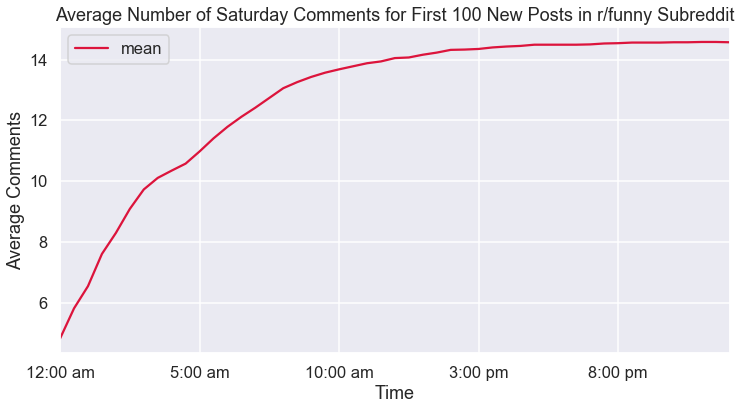

In [42]:
# Plot Saturday comments
df_Saturday_mean_comments.plot(figsize = (12, 6), color = 'crimson')
plt.title('Average Number of Saturday Comments for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Comments')

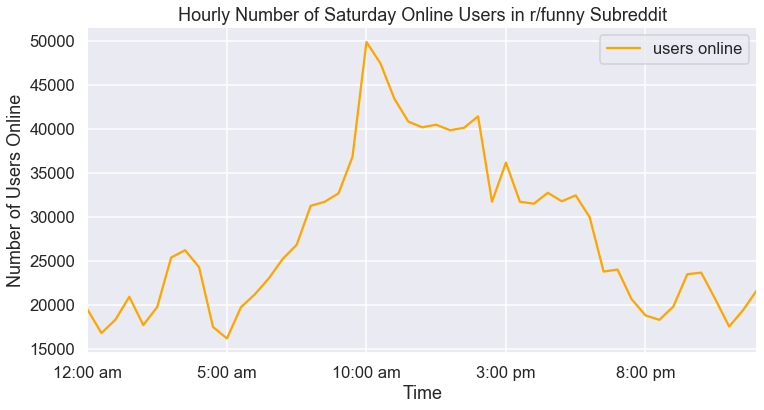

In [43]:
# Plot Saturday online users
df_Saturday_online_users.plot(figsize = (12, 6), color = 'orange')
plt.title('Hourly Number of Saturday Online Users in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Number of Users Online')
legend = plt.legend()
legend.get_texts()[0].set_text('users online')

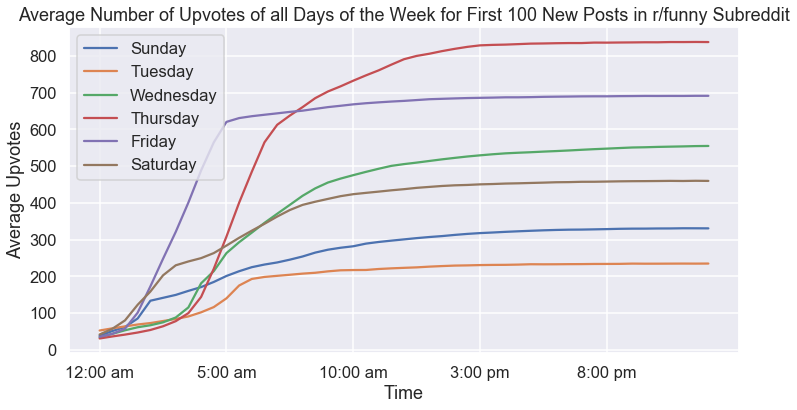

In [44]:
plt.figure(figsize = (12, 6))
plt.plot(df_Sunday_mean_upvotes, label = 'Sunday')
#plt.plot(df_Monday_mean_upvotes, label = 'Monday')
plt.plot(df_Tuesday_mean_upvotes, label = 'Tuesday')
plt.plot(df_Wednesday_mean_upvotes, label = 'Wednesday')
plt.plot(df_Thursday_mean_upvotes, label = 'Thursday')
plt.plot(df_Friday_mean_upvotes, label = 'Friday')
plt.plot(df_Saturday_mean_upvotes, label = 'Saturday')
plt.xticks(np.arange(0, 49, 10))
plt.title('Average Number of Upvotes of all Days of the Week for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Upvotes')
plt.legend(loc='upper left')

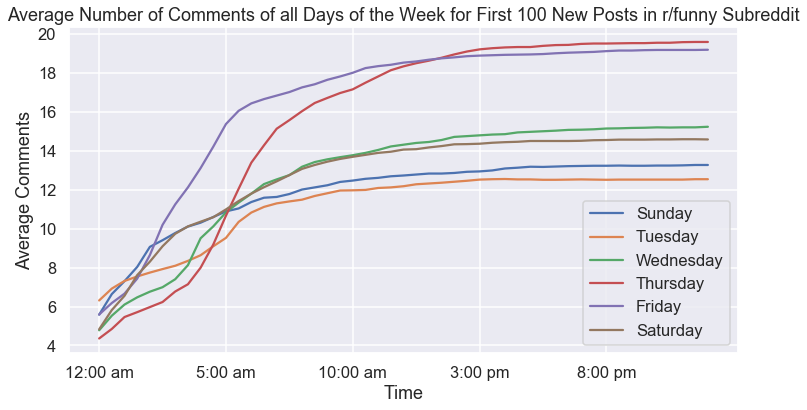

In [45]:
plt.figure(figsize = (12, 6))
plt.plot(df_Sunday_mean_comments, label = 'Sunday')
#plt.plot(df_Monday_mean_comments, label = 'Monday')
plt.plot(df_Tuesday_mean_comments, label = 'Tuesday')
plt.plot(df_Wednesday_mean_comments, label = 'Wednesday')
plt.plot(df_Thursday_mean_comments, label = 'Thursday')
plt.plot(df_Friday_mean_comments, label = 'Friday')
plt.plot(df_Saturday_mean_comments, label = 'Saturday')
plt.xticks(np.arange(0, 49, 10))
plt.title('Average Number of Comments of all Days of the Week for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Comments')
plt.legend(loc='lower right')

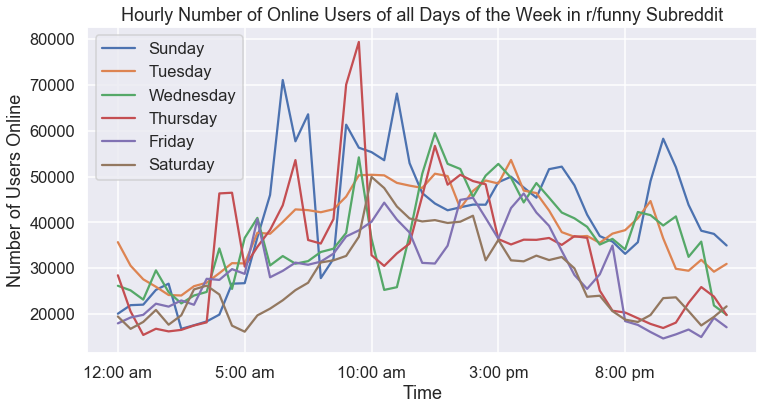

In [46]:
plt.figure(figsize = (12, 6))
plt.plot(df_Sunday_online_users, label = 'Sunday')
#plt.plot(df_Monday_online_users, label = 'Monday')
plt.plot(df_Tuesday_online_users, label = 'Tuesday')
plt.plot(df_Wednesday_online_users, label = 'Wednesday')
plt.plot(df_Thursday_online_users, label = 'Thursday')
plt.plot(df_Friday_online_users, label = 'Friday')
plt.plot(df_Saturday_online_users, label = 'Saturday')
plt.xticks(np.arange(0, 49, 10))
plt.title('Hourly Number of Online Users of all Days of the Week in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Number of Users Online')
plt.legend(loc='upper left')

# Ethics & Privacy

   As discussed in the introduction of our research, the implicaitons of this data is great. Although there are many limitations in the methods of our data collection process, the concept of this research question is very important. Using the data from this research in other subreddits could lead to more serious effects on post interaction. Users could utilize these findings to strategically generate the most karma per post, click-farms can capitilize on this time efficacy, companies can maximize the monetary value of their marketing posts, and unfortunately, hategroups or negative propganda posts can also rely on this data for maximum viewer exposure and sharing potential.

   Additionally, although we do not collect any personally identifying information, the data collected is user generated and therefore may lead to a loss of confidentiality in ways we cannot forsee. For example, one issue we encountered was when we collected the current online active subscribers of r/funny; these username identifications are mostly annonymous but can inherently contain personally identifying aspects. Furthermore, if these research methods are expanded to mutiple subreddits, users can be cross idenified as being active in various subreddits that are personally identifying that can very well lead to loss of annomitiy. 

# Conclusion & Discussion

*Fill in your discussion information here*